### Random Sample Imputation

Aim: Random sample imputation is similar to meam/media but it's consists of taking random observation from the dataset and we use this observation to replace the NaN values

Note: Mean/Media uses for MCAR

When should it be used?

It assumes that the data are missing completely at random(MCAR)

In [1]:
import pandas as pd
df = pd.read_csv(r'C:\\Users\\doguy\\Desktop\\Documentations\\titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [2]:
df.isnull().sum() #How many there are missing values in dataset?  
                    #You can use .mean() to see missing values as percentage

Survived      0
Age         177
Fare          0
dtype: int64

In [3]:
df['Age'].dropna().sample() # .sample() function is used to take a sample randomly from the feature that we choose

487    58.0
Name: Age, dtype: float64

In [4]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0) #It is replacing all NaN Values with the sample values

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [5]:
def impute_nan(df1,variable,median): #3 values : df, a future that has NaN Value, median module
    df[variable+"_median"] = df[variable].fillna(median) # --> Use "median" to fill NaN values
    df[variable+"_random"] = df[variable]
    ##It will have the random sample to fill the NaN values
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample


In [6]:
median = df.Age.median()

impute_nan(df,"Age",median)

In [7]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

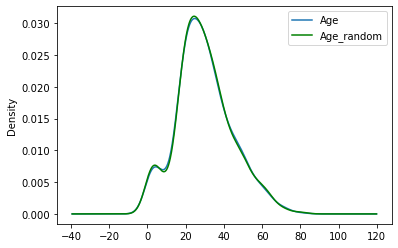

In [10]:


fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind = 'kde', ax = ax)
df.Age_random.plot(kind = 'kde', ax=ax, color='green')
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

#### Advantages

1. Easy to impleemnt
2. There is less distortion in the dataset

#### Disadvantages

1. Every sitution randomness won't work


# 3. Technique: Capturing NaN Values With A New Feature

It works well if the adata are not missing completely at random (MNAR)

In [11]:
df = pd.read_csv(r'C:\\Users\\doguy\\Desktop\\Documentations\\titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [12]:
import numpy as np
df['Age_NA']=np.where(df['Age'].isnull(),1,0)

In [13]:
df.head()

,Survived,Age,Fare,Age_NA
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [18]:
df['Age'].fillna(df.Age.median(),inplace=True)
 #You can use median to fill the NaN values

#### Advantages

1. Easy to implement
2. Captures rhe importance of missing values

#### Disadvantages

1. Creating additional features(Curse of dimensionality)

# End of Distribution imputation

In [19]:
df = pd.read_csv(r'C:\\Users\\doguy\\Desktop\\Documentations\\titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

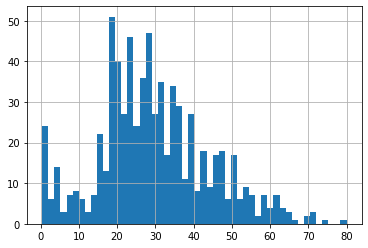

In [20]:
df.Age.hist(bins=50)

In [23]:
####

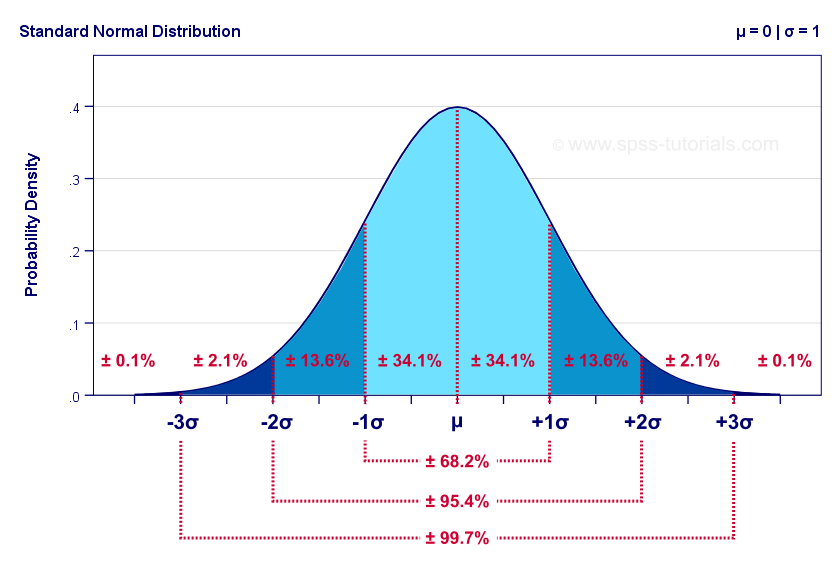

In [29]:
extreme = df.Age.mean()+3*df.Age.std()
#With this formula, we can reach the end of distribution in the dataset

In [48]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_disturbation"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [49]:
impute_nan(df,'Age',df.Age.median(),extreme)
df.Age_end_disturbation.isnull().sum()

0

In [50]:
df.head()

,Survived,Age,Fare,Age_end_disturbation
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


<AxesSubplot:>

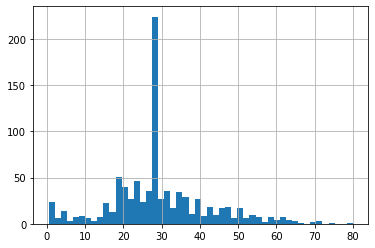

In [51]:
df.Age.hist(bins=50)

<AxesSubplot:>

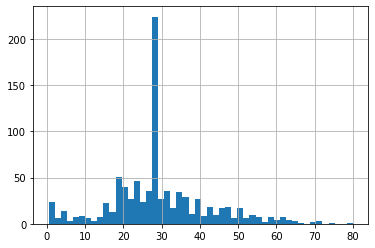

In [53]:
df['Age_end_disturbation'].hist(bins=50)

C:\Users\doguy\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_disturbation'>

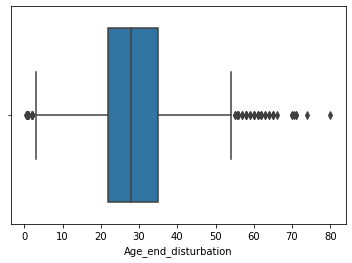

In [54]:
import seaborn as sns
sns.boxplot('Age_end_disturbation',data=df)
#Outlayers has been captured

In [ ]:
#### Note: I couldn't understand what 
        #is the problem that i faced -Dou